In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [19]:
from IPython.display import Image,display

# Binomial Distribution

## Lets Solve some real world problem related to Binomial Distribution


We are given a sample dataset That contains match results of Bangladesh cricket team of all three formats (Test, ODI, T20) till 2021. 
Each row contains home_team, away_team and match result (winner/ drawn/ no result) of every match.

    (a)

        (i)   Identify the probability distribution of the above dataset?

        (ii)  What are the observations which helps you to figure out the above distribution?

        (iii) Find the mean, variance and standard diviation for the above distribution?
      
    (b)
          (i) What is the probability of the Bangladesh cricket team winning 10 matches out of all the
              matches played in the dataset? 
              
         (ii) What is the probability of the Bangladesh cricket team winning more than half of their matches
              in the entire dataset?
              
        (iii) Given the historical win rate of the Bangladesh cricket team, what is the probability of them
              winning a maximum number of consecutive matches?
         
         
         
 ## Answers
 
     (a) 
     
         (i) Binomial Distribution
     
        (ii)
        
            The scenario is considered a binomial distribution because it meets the key characteristics and assumptions of a 
            binomial experiment:

            Fixed Number of Trials: Each match played by the Bangladesh cricket team is considered a trial. The total number 
            of matches in the dataset is fixed and known in advance.

            Independent Trials: The outcome of one match (win or loss) does not influence the outcome of other matches.
            Each match is independent of the others.

            Two Possible Outcomes: Each match can have one of two possible outcomes: a win or not a win. 
            We are interested in the number of wins (successes) out of the total matches played.

            Constant Probability of Success: The probability of the Bangladesh cricket team winning a match remains 
            approximatelyconstant throughout the dataset, assuming that the team's performance remains consistent.
            
       (iii)


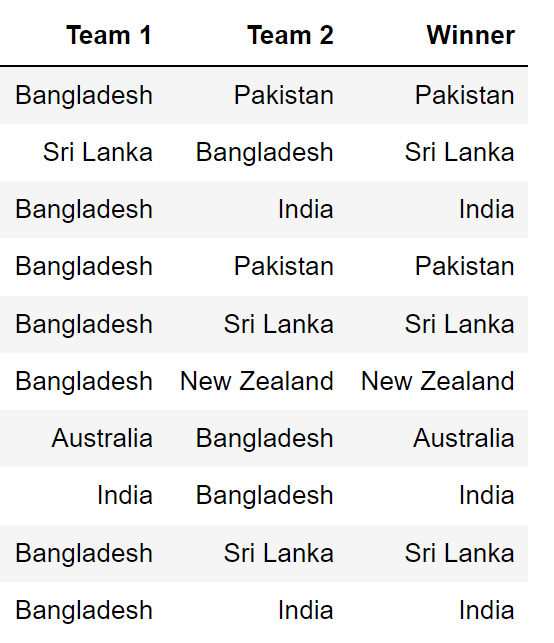

In [72]:
display(Image('C:\\Users\\USER\\Desktop\\CS\\CSCI 12022 - Probability Distribution and Applications\\cricket_data_set.PNG', width=400, unconfined=True))

In [85]:
df = pd.read_csv("C:\\Users\\USER\\Desktop\\CS\\CSCI 12022 - Probability Distribution and Applications\\BD Cricket Team match results-ODI.csv")
df = df.sample(50, random_state=2023)
df.head()

,Team 1,Team 2,Winner
257,Bangladesh,Pakistan,Pakistan
137,Bangladesh,Zimbabwe,Bangladesh
339,Bangladesh,Sri Lanka,Sri Lanka
196,Bangladesh,Zimbabwe,Bangladesh
276,Bangladesh,Sri Lanka,Sri Lanka


In [86]:
df.dropna(inplace=True)

In [87]:
df.Winner.value_counts()

Bangladesh      20
Zimbabwe         7
Sri Lanka        6
India            5
Pakistan         4
Australia        2
West Indies      2
no result        1
Canada           1
New Zealand      1
South Africa     1
Name: Winner, dtype: int64

### Now we need to identify two outcomes of the dataset. To obtain that we create a new data column which shows  1 for winning and 0 for loss the match

In [88]:
df['BAN_won'] = [1 if x == "Bangladesh" else 0 for x in df.Winner]
df.sample(10)

,Team 1,Team 2,Winner,BAN_won
101,Bangladesh,Zimbabwe,Zimbabwe,0
4,Bangladesh,Sri Lanka,Sri Lanka,0
288,West Indies,Bangladesh,West Indies,0
331,Bangladesh,India,India,0
203,Zimbabwe,Bangladesh,Zimbabwe,0
377,Bangladesh,West Indies,Bangladesh,1
196,Bangladesh,Zimbabwe,Bangladesh,1
299,Bangladesh,India,India,0
30,Bangladesh,New Zealand,New Zealand,0
353,Bangladesh,West Indies,West Indies,0


## Finding Mean, Variance and Standard Deviation

## Mean = n x p 

## Var = n x p x q

## Sd = √npq

In [89]:
n = len(df)

total_matches = len(df)
matches_won = len(df[df['BAN_won'] == 1])

p = matches_won / total_matches
print(f"Mean is : {n*p}")

Mean is : 20.0


In [90]:
print(f"Variance is : {n*p*(1-p)}")

Variance is : 12.0


In [91]:
import math

var = math.sqrt(n*p*(1-p))

print(f"Standard deviation is : {var}")

Standard deviation is : 3.4641016151377544


In [45]:
import numpy as np
from scipy.special import comb

total_matches = len(df)
matches_won = len(df[df['BAN_won'] == 1])

def binomial_probability(matches_won, total_matches, specific_wins):
    p_success = matches_won / total_matches
    probability = comb(total_matches, specific_wins) * (p_success ** specific_wins) * ((1 - p_success) ** (total_matches - specific_wins))
    return probability

specific_wins = 10  # Replace with the specific number of wins you want to calculate the probability for
probability_specific_wins = binomial_probability(matches_won, total_matches, specific_wins)
print(f"Probability of winning {specific_wins} matches: {probability_specific_wins:.4f}")


Probability of winning 10 matches: 0.0014


In [46]:
half_total_matches = total_matches // 2
wins_more_than_half = sum(df['BAN_won'] == 1) > half_total_matches

def binomial_probability_more_than_half(matches_won, total_matches, half_total_matches):
    p_success = matches_won / total_matches
    probability = sum(binomial_probability(matches_won, total_matches, i) for i in range(half_total_matches + 1, total_matches + 1))
    return probability

probability_wins_more_than_half = binomial_probability_more_than_half(matches_won, total_matches, half_total_matches)
print(f"Probability of winning more than half of the matches: {probability_wins_more_than_half:.4f}")


Probability of winning more than half of the matches: 0.0573


In [52]:
def consecutive_winning_streak(data):
    consecutive_wins = 0
    max_consecutive_wins = 0
    for result in data['BAN_won']:
        if result == 1:
            consecutive_wins += 1
            max_consecutive_wins = max(max_consecutive_wins, consecutive_wins)
        else:
            consecutive_wins = 0
    return max_consecutive_wins

def binomial_probability_consecutive_wins(matches_won, total_matches, specific_wins):
    p_success = matches_won / total_matches
    probability = comb(total_matches, specific_wins) * (p_success ** specific_wins) * ((1 - p_success) ** (total_matches - specific_wins))
    return probability

max_consecutive_wins = consecutive_winning_streak(df)
probability_specific_wins_consecutive = binomial_probability_consecutive_wins(matches_won, total_matches, max_consecutive_wins)
print(f"The maximum consecutive wins: {max_consecutive_wins}")
print(f"Probability of winning {max_consecutive_wins} consecutive matches: {probability_specific_wins_consecutive:.8f}")

The maximum consecutive wins: 4
Probability of winning 4 consecutive matches: 0.00000037


## Lets plot the data into a graph

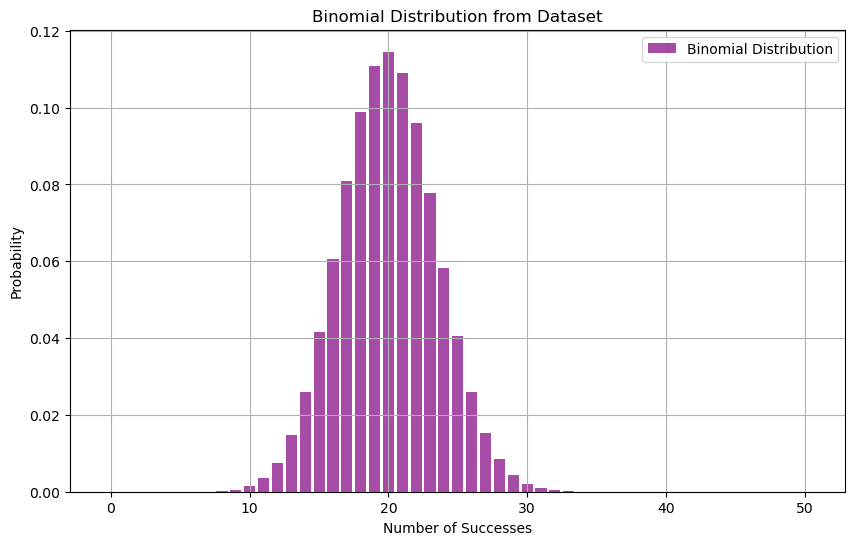

In [118]:
# Sample dataset (replace this with your actual dataset)
data = df['BAN_won']

# Count the occurrences of 1 and 0 in the dataset
num_ones = sum(data)
num_zeros = len(data) - num_ones

# Calculate the probability of getting a 1 (success) in a single trial
p = num_ones / len(data)

# Generate the binomial distribution
k = np.arange(0, len(data) + 1)
binomial_dist = np.array([np.math.comb(len(data), i) * (p ** i) * ((1 - p) ** (len(data) - i)) for i in k])

# Plot the binomial distribution
plt.figure(figsize=(10, 6))
plt.bar(k, binomial_dist, label='Binomial Distribution', alpha=0.7, color = 'purple')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution from Dataset')
plt.legend()
plt.grid(True)
plt.show()


# PMF vs CDF

In [116]:
def binomial_pmf_cdf(n, p):
    # Generate binomial distribution
    k = np.arange(0, n+1)
    binomial_pmf = np.array([np.math.comb(n, i) * (p ** i) * ((1 - p) ** (n - i)) for i in k])
    binomial_cdf = np.cumsum(binomial_pmf)

    # Plot PMF and CDF
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(k, binomial_pmf, label='PMF', alpha=0.7)
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.title(f'Probability Mass Function (PMF)\nBinomial Distribution (n={n}, p={p})')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(k, binomial_cdf, label='CDF', marker='o', color = 'red')
    plt.xlabel('Number of Successes')
    plt.ylabel('Cumulative Probability')
    plt.title(f'Cumulative Distribution Function (CDF)\nBinomial Distribution (n={n}, p={p})')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widgets
n_slider = widgets.IntSlider(min=1, max=100, step=1, value=10, description='n:')
p_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='p:')

interact(binomial_pmf_cdf, n=n_slider, p=p_slider)


interactive(children=(IntSlider(value=10, description='n:', min=1), FloatSlider(value=0.5, description='p:', m…

<function __main__.binomial_pmf_cdf(n, p)>

# Cumulative Distribution function (Binomial distribution)

In [119]:
from ipywidgets import interact, Layout, VBox, HBox

def binomial_cdf(n, p):
    # Generate binomial distribution
    k = np.arange(0, n+1)
    binomial_dist = np.array([np.math.comb(n, i) * (p ** i) * ((1 - p) ** (n - i)) for i in k])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(binomial_dist)
    
    # Create a DataFrame for the table
    table_data = {'Number of Successes (k)': k, 'Cumulative Probability': cdf}
    df = pd.DataFrame(table_data)

    # Plot the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(k, cdf, label='Cumulative Distribution Function (CDF)', marker='o', color = 'green')
    plt.xlabel('Number of Successes')
    plt.ylabel('Cumulative Probability')
    plt.title(f'Cumulative Distribution Function for Binomial Distribution (n={n}, p={p})')
    plt.legend()
    plt.grid(True)

    # Display the graph and table side by side
    graph_output = widgets.Output()
    table_output = widgets.Output()

    with graph_output:
        plt.show()

    with table_output:
        display(df)

    output_layout = Layout(flex='1 1', display='flex')
    hbox = HBox([graph_output, table_output], layout=output_layout)
    display(hbox)

# Interactive widgets
n_slider = widgets.IntSlider(min=1, max=100, step=1, value=10, description='n:')
p_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='p:')

interact(binomial_cdf, n=n_slider, p=p_slider)


interactive(children=(IntSlider(value=10, description='n:', min=1), FloatSlider(value=0.5, description='p:', m…

<function __main__.binomial_cdf(n, p)>

#  Comparing CDF functions based on "n" and "p"

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to calculate the cumulative distribution function (CDF) of the binomial distribution
def binomial_cdf(k, n, p):
    return np.sum([comb(n, i) * (p ** i) * ((1 - p) ** (n - i)) for i in range(k + 1)])

# Function to update the plot based on selected values of n and p
def update_plot(n1, p1, n2, p2, n3, p3):
    x = np.arange(0, max(n1, n2, n3) + 1)
    y1 = [binomial_cdf(i, n1, p1) for i in x]
    y2 = [binomial_cdf(i, n2, p2) for i in x]
    y3 = [binomial_cdf(i, n3, p3) for i in x]

    plt.plot(x, y1, label=f'n={n1}, p={p1:.2f}', color='blue')
    plt.plot(x, y2, label=f'n={n2}, p={p2:.2f}', color='green')
    plt.plot(x, y3, label=f'n={n3}, p={p3:.2f}', color='red')
    
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Distribution Function (CDF) of Binomial Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for n and p values
n1_widget = widgets.IntSlider(value=10, min=1, max=100, step=1, description='n1')
p1_widget = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='p1')

n2_widget = widgets.IntSlider(value=20, min=1, max=100, step=1, description='n2')
p2_widget = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description='p2')

n3_widget = widgets.IntSlider(value=15, min=1, max=100, step=1, description='n3')
p3_widget = widgets.FloatSlider(value=0.7, min=0, max=1, step=0.01, description='p3')

# Create interactive plot
interactive_plot = widgets.interactive(update_plot, n1=n1_widget, p1=p1_widget, n2=n2_widget, p2=p2_widget, n3=n3_widget, p3=p3_widget)
display(interactive_plot)


interactive(children=(IntSlider(value=10, description='n1', min=1), FloatSlider(value=0.5, description='p1', m…

# Binomial approximation for Normal Distribution 

In [101]:
def binomial_approximation(n, p):
    # Generate binomial distribution
    k = np.arange(0, n+1)
    binomial_dist = np.array([np.math.comb(n, i) * (p ** i) * ((1 - p) ** (n - i)) for i in k])

    # Calculate the parameters of the normal distribution (mu and sigma)
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))

    # Generate normal distribution
    x = np.linspace(0, n, 1000)
    normal_dist = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

    # Plot both distributions
    plt.figure(figsize=(10, 6))
    plt.bar(k, binomial_dist, label='Binomial Distribution')
    plt.plot(x, normal_dist, label='Normal Distribution', color='red')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.title(f'Binomial Approximation to Normal Distribution (n={n}, p={p})')
    plt.legend()
    plt.show()

# Interactive widgets
n_slider = widgets.IntSlider(min=1, max=100, step=1, value=10, description='n:')
p_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='p:')

interact(binomial_approximation, n=n_slider, p=p_slider)


interactive(children=(IntSlider(value=10, description='n:', min=1), FloatSlider(value=0.5, description='p:', m…

<function __main__.binomial_approximation(n, p)>

# Normal Distribution 

In [106]:
import seaborn as sn

# Lets solve a real world problem related to Normal Distribution

### We are given a dataset of heights of students. Base on this dataset lets solve some problems.


    1.) When height is  69.88 inches , what is the score?
    
    2.) what is the probability that height is less than 70 inches?
    
    3.) What is the probability that height is more than 75 inches?
    
    4.) What is the probability that height is between 65 and 75 inches?


In [107]:
df1 = pd.read_csv("C:\\Users\\USER\\Desktop\\CS\\CSCI 12022 - Probability Distribution and Applications\\weight-height.csv")
df1.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [108]:
df1.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## Lets plot our dataset

<Axes: xlabel='Height', ylabel='Count'>

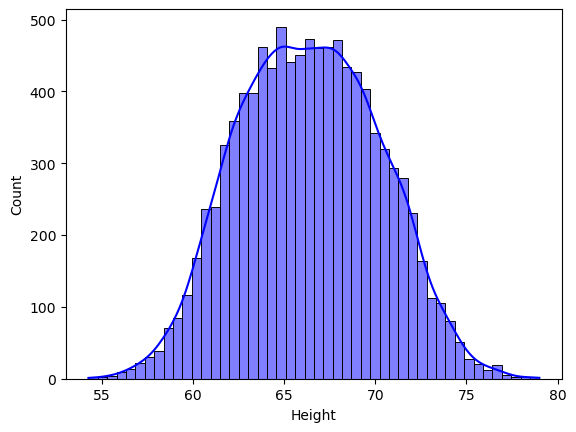

In [122]:
sn.histplot(df1.Height, kde=True, color= 'blue')

In [110]:
mean1 = df1.Height.mean()
mean1

66.367559754866

In [111]:
std_deviation = df1.Height.std()
std_deviation

3.847528120795573

In [112]:
df1['zscore'] = ( df1.Height - df1.Height.mean() ) / df1.Height.std()
df1.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
5,Male,67.253016,0.230136
6,Male,68.785081,0.628331
7,Male,68.348516,0.514865
8,Male,67.018950,0.169301
9,Male,63.456494,-0.756607
